In [1]:
import os
from binance.client import Client
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

In [2]:
api_key = 'zQQmi6JI31vLt3tZSCet7dvrET2Qg5pq3PcxqCsrzb5Hl4f6sI4IoYduKIGNCIwX'
api_secret = 'TGId4L8bw5ClniGSzdrKHHe1uwEizLdft3A59Ks6fP4bKz824OHg9sPChngmhL2t'
client = Client(api_key, api_secret)

In [3]:
def get_ticker_price(ticker_symbol: str, days:int ):
    """
    Get ticker price of a specific coin
    """

    target_date = (datetime.now() -timedelta(days = days)).strftime("%d %b %Y %H:%M:%S")
    key = f"{ticker_symbol}"
    end_date = datetime.now() 
    end_date = end_date.strftime("%d %b %Y %H:%M:%S")
    
    coindata = pd.DataFrame(columns = [key])
    
    prices = []
    dates = []
    for result in client.get_historical_klines(
        ticker_symbol, "1m", target_date, end_date, limit=1000
        ):
        date = datetime.utcfromtimestamp(result[0] / 1000).strftime("%d %b %Y %H:%M:%S")
        price = float(result[1])
        dates.append(date)
        prices.append(price)

    coindata[key] = prices
    coindata['date'] = dates

    return(coindata.reindex(columns =['date',key]))

In [4]:
# Grab coin prices from binance server 
# Add your own obviously
coinIDs = ['ADA' ,
           'ATOM', 
           'BAT', 
           'BTT', 
           'DASH', 
           'EOS',
           'ETC', 
           'ICX',
           'IOTA', 
           'NEO', 
           'OMG', 
           'ONT', 
           'QTUM',
           'TRX', 
           'VET', 
           'XLM', 
           'XMR']

cointickers = [coin+'USDT' for coin in coinIDs]

### Set Period here, this is the number of days of data you want to download for each coin ###
num_days = 3
###

#Create initial df with first coin then fill with all from list
coindata = get_ticker_price(cointickers[0],num_days)
for tick in cointickers[1:]:
    newdata = get_ticker_price(tick,num_days)
    coindata = pd.merge(coindata, newdata)


<AxesSubplot:xlabel='date'>

<Figure size 2000x800 with 0 Axes>

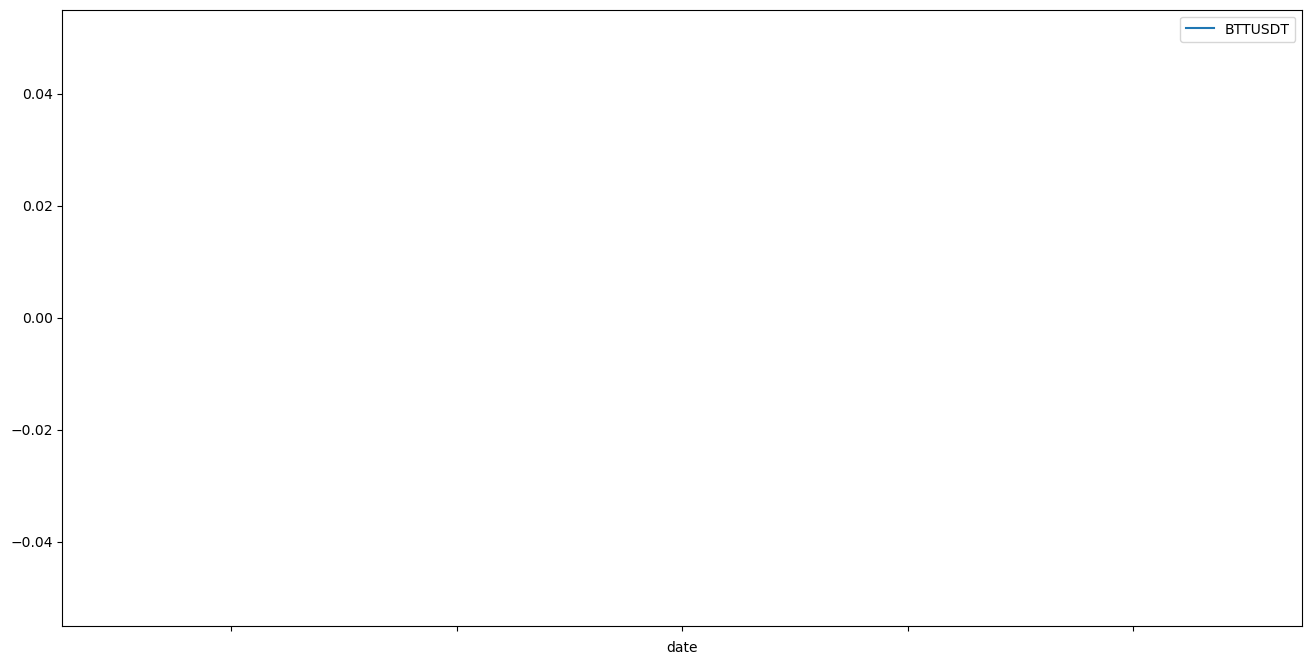

In [5]:
## Sanity checker, Are we getting the data? Let's plot it
def plotmovement(x1, y1,ticker):
    '''
    plots the noise of two coins 
    '''
    fig = plt.figure(figsize=(20,8))
    plt.plot( x1, y1,label=ticker)
    plt.legend()

## Too much data so lets just plot a subset.
    
start = 0
end = 200

fig = plt.figure(figsize=(20,8))
coindata.plot('date','BTTUSDT',figsize = (16,8),)

In [6]:
# print correlation table
coindata.corr()

,ADAUSDT,ATOMUSDT,BATUSDT,BTTUSDT,DASHUSDT,EOSUSDT,ETCUSDT,ICXUSDT,IOTAUSDT,NEOUSDT,OMGUSDT,ONTUSDT,QTUMUSDT,TRXUSDT,VETUSDT,XLMUSDT,XMRUSDT
ADAUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATOMUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BATUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BTTUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DASHUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EOSUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ETCUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ICXUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IOTAUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NEOUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


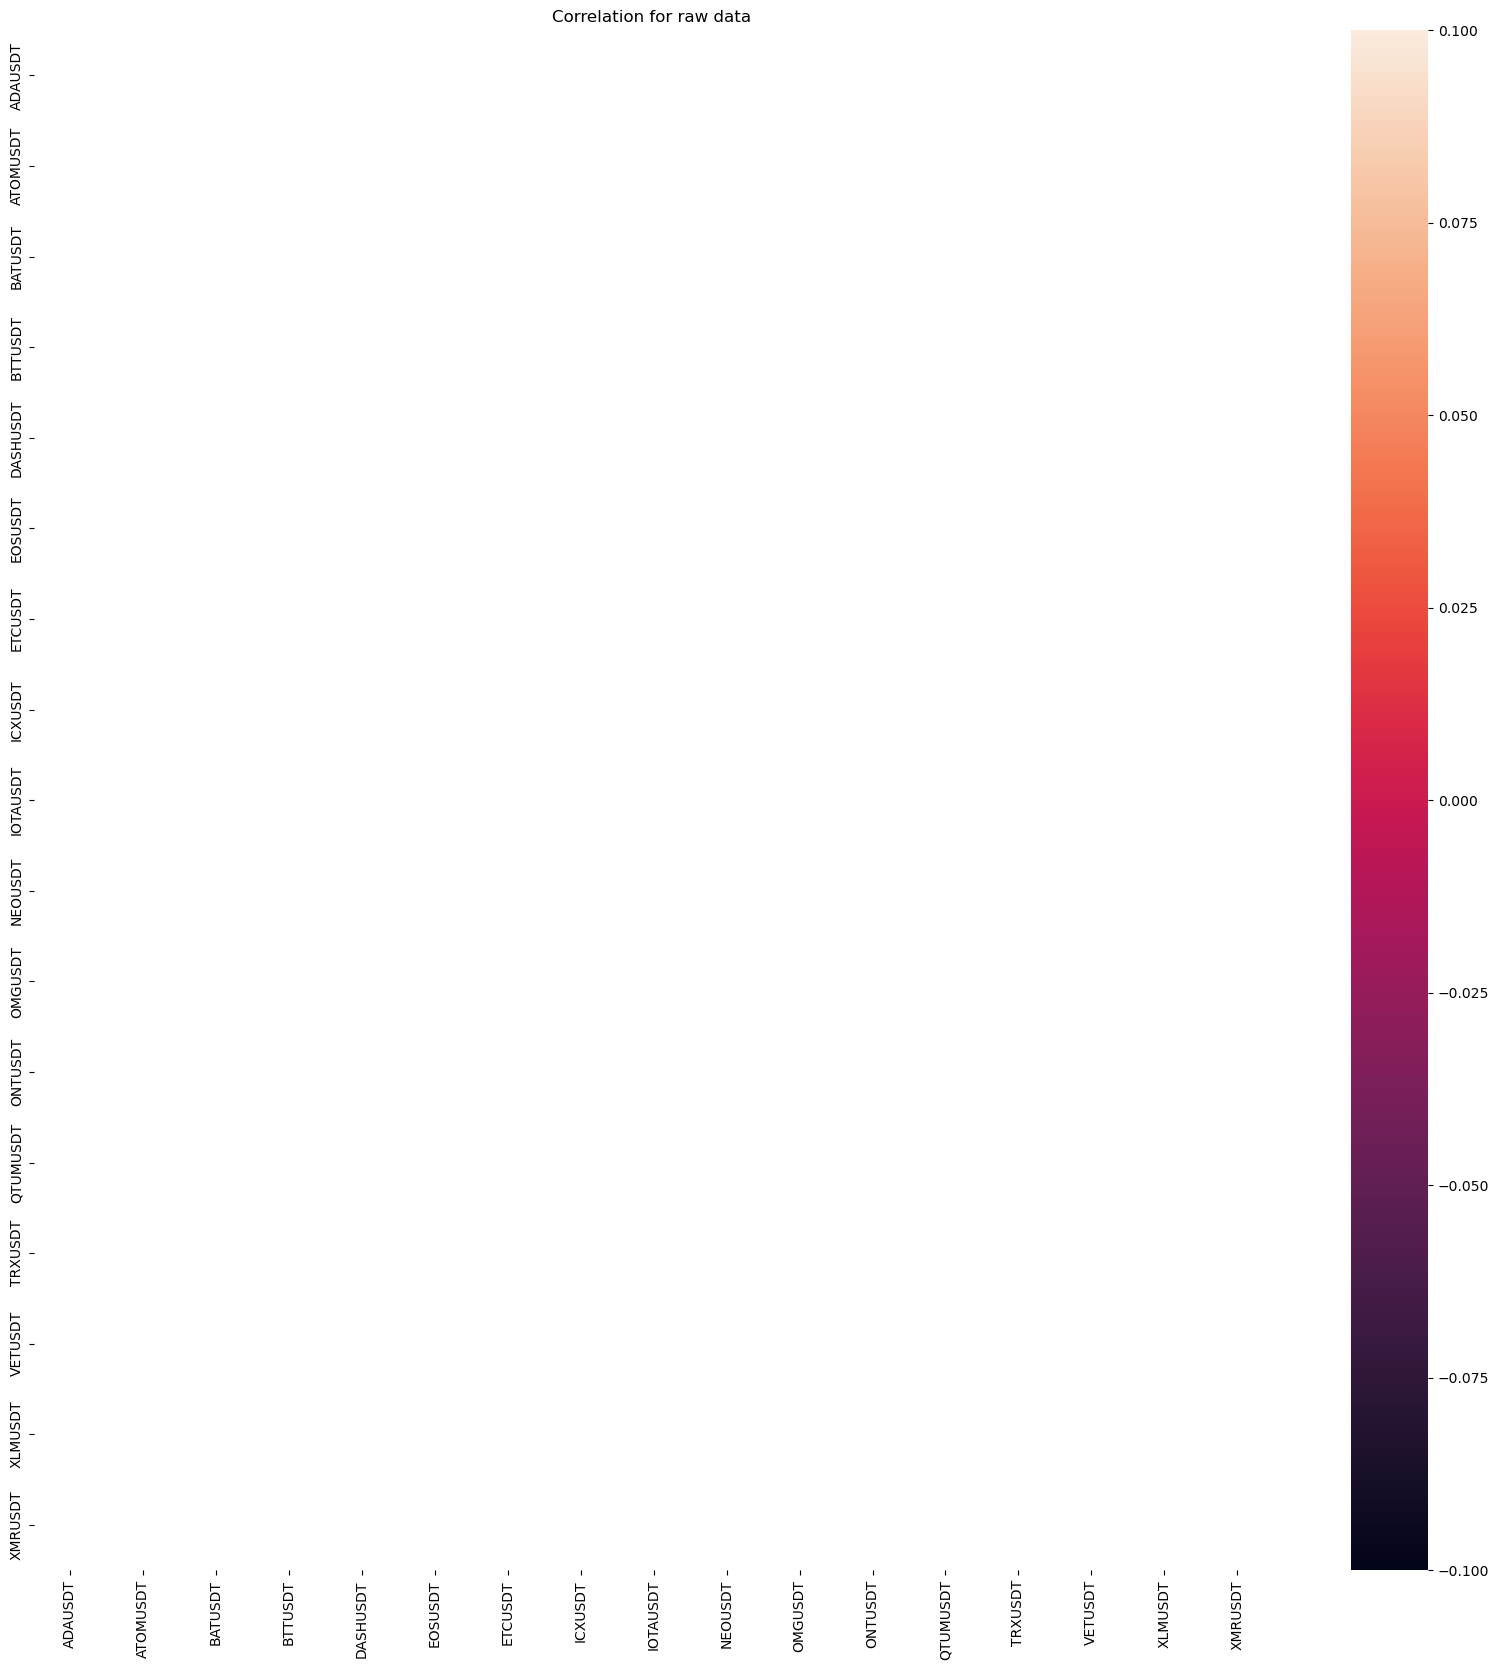

In [7]:
## Correlation matrix for raw data. 
corrMatrix = coindata.corr()
fig = plt.figure(figsize=(20,20))
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation for raw data ')
plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


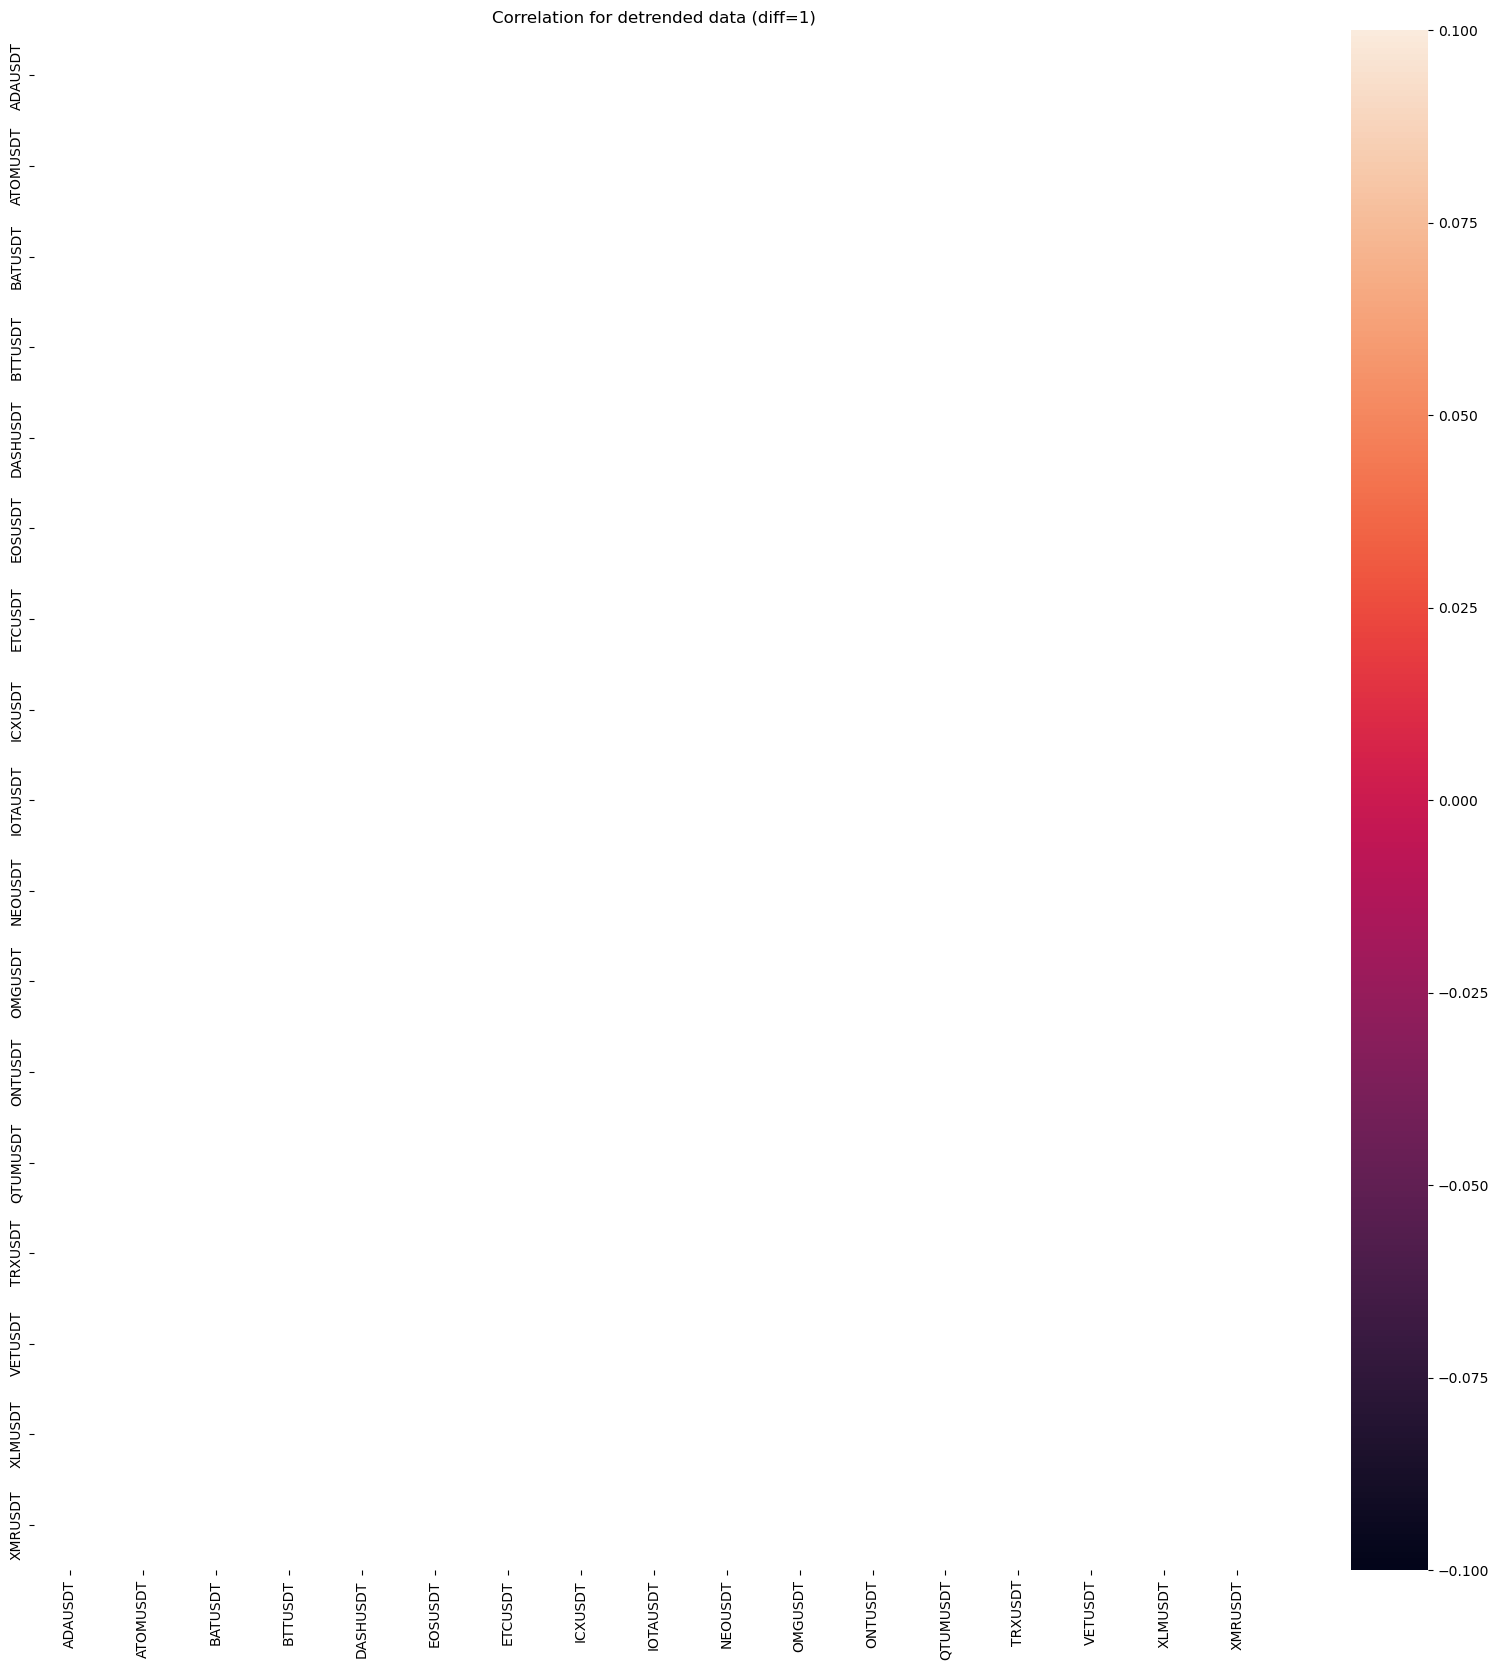

In [8]:
### Detrend the data using first difference 
### more info at https://youtu.be/nPYPyh20gGo

detrendeddata = pd.DataFrame()

for column in coindata:
    if column != 'date':
        detrendeddata[column] = coindata[column].diff(1)
        
corrMatrix = detrendeddata.corr()
fig = plt.figure(figsize=(20,20))
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation for detrended data (diff=1)')
plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


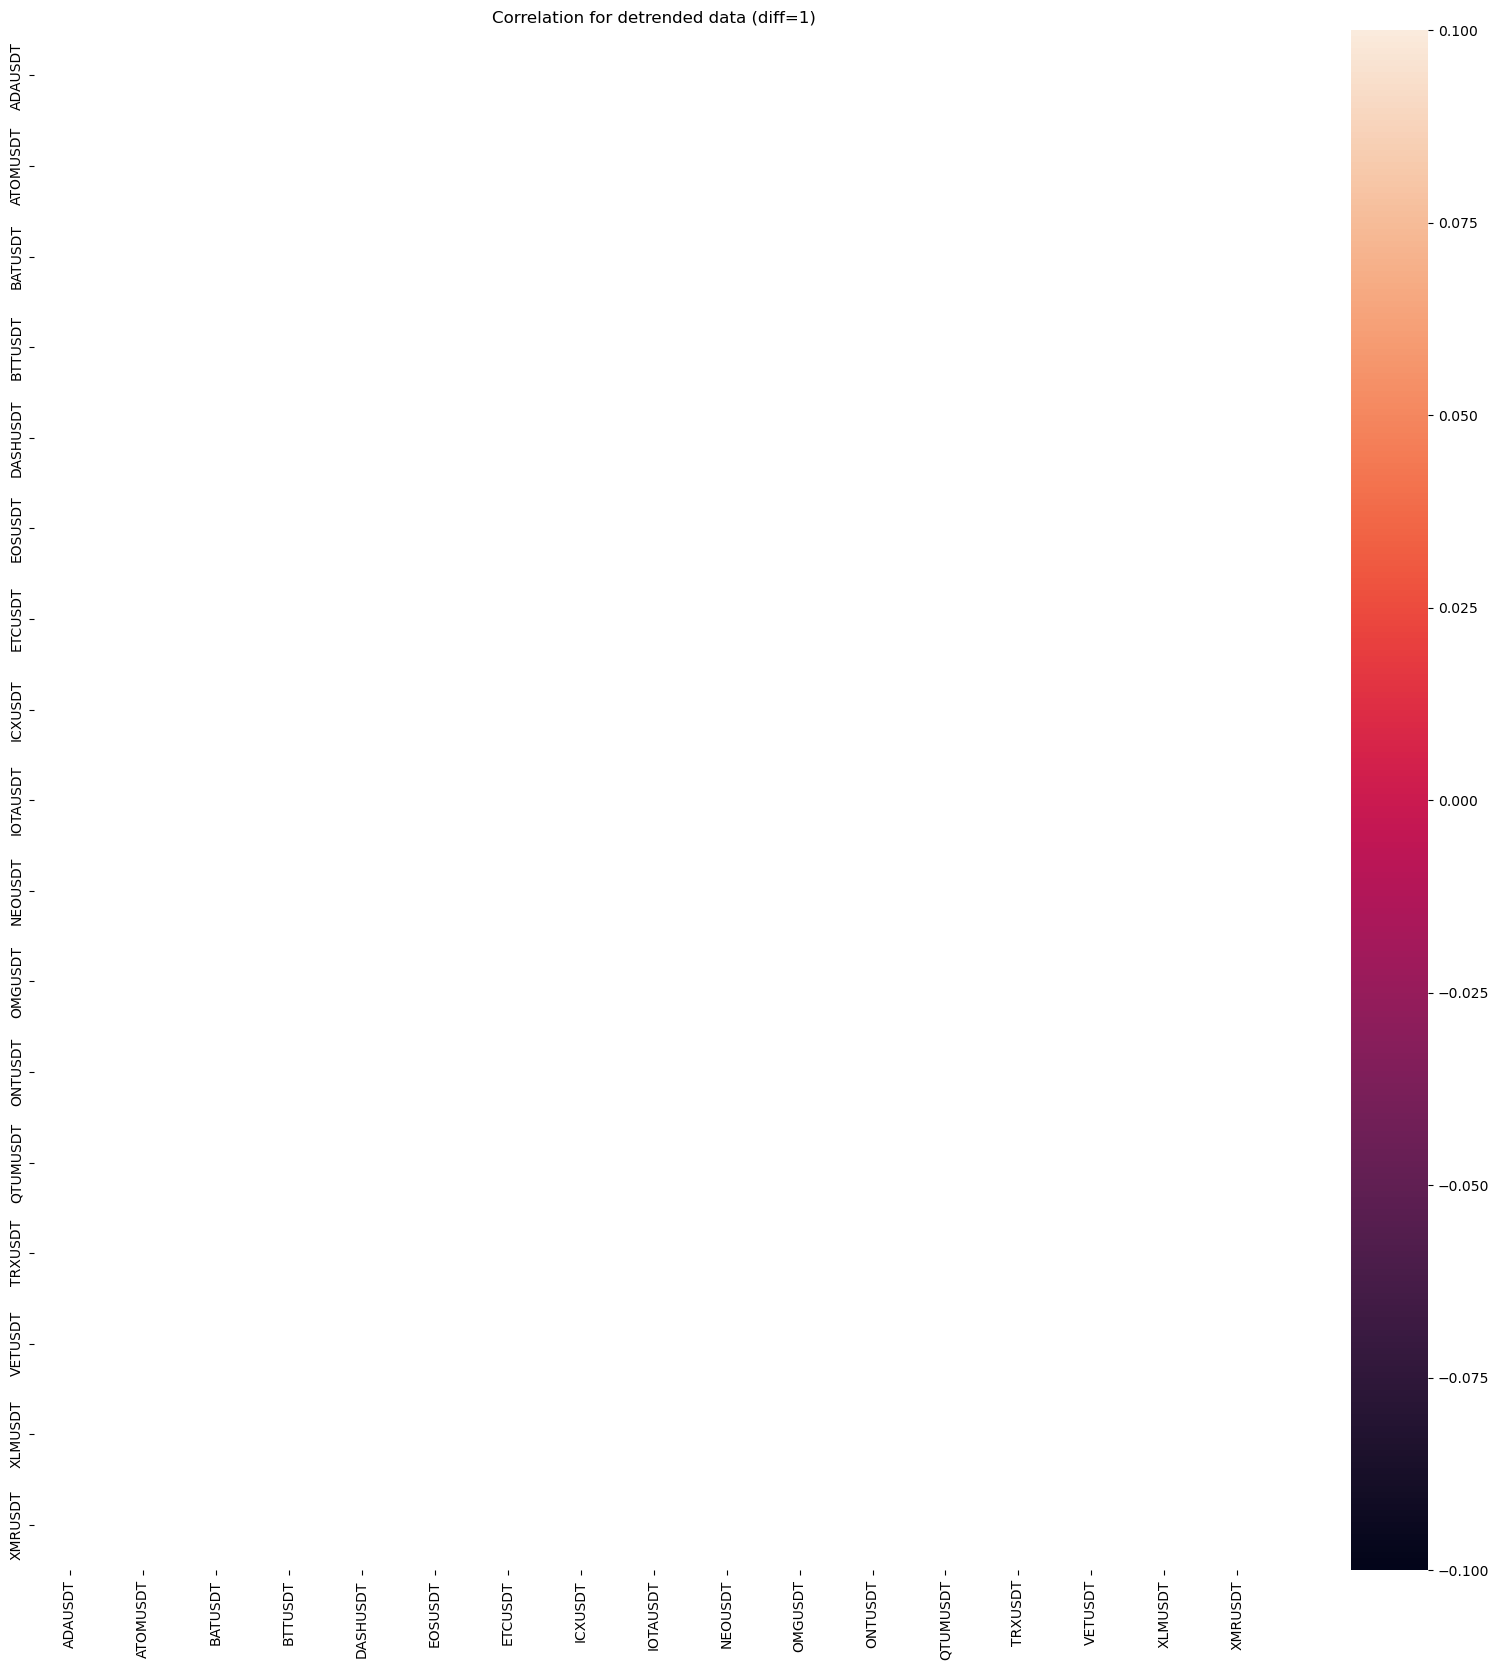

In [9]:
### Detrend the data using rolling average
radf = pd.DataFrame()

for column in coindata:
    if column != 'date':
        radf[column] = coindata[column]-coindata[column].rolling(window=3).mean()
        
corrMatrix = radf.corr()
fig = plt.figure(figsize=(20,20))
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation for detrended data (diff=1)')
plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


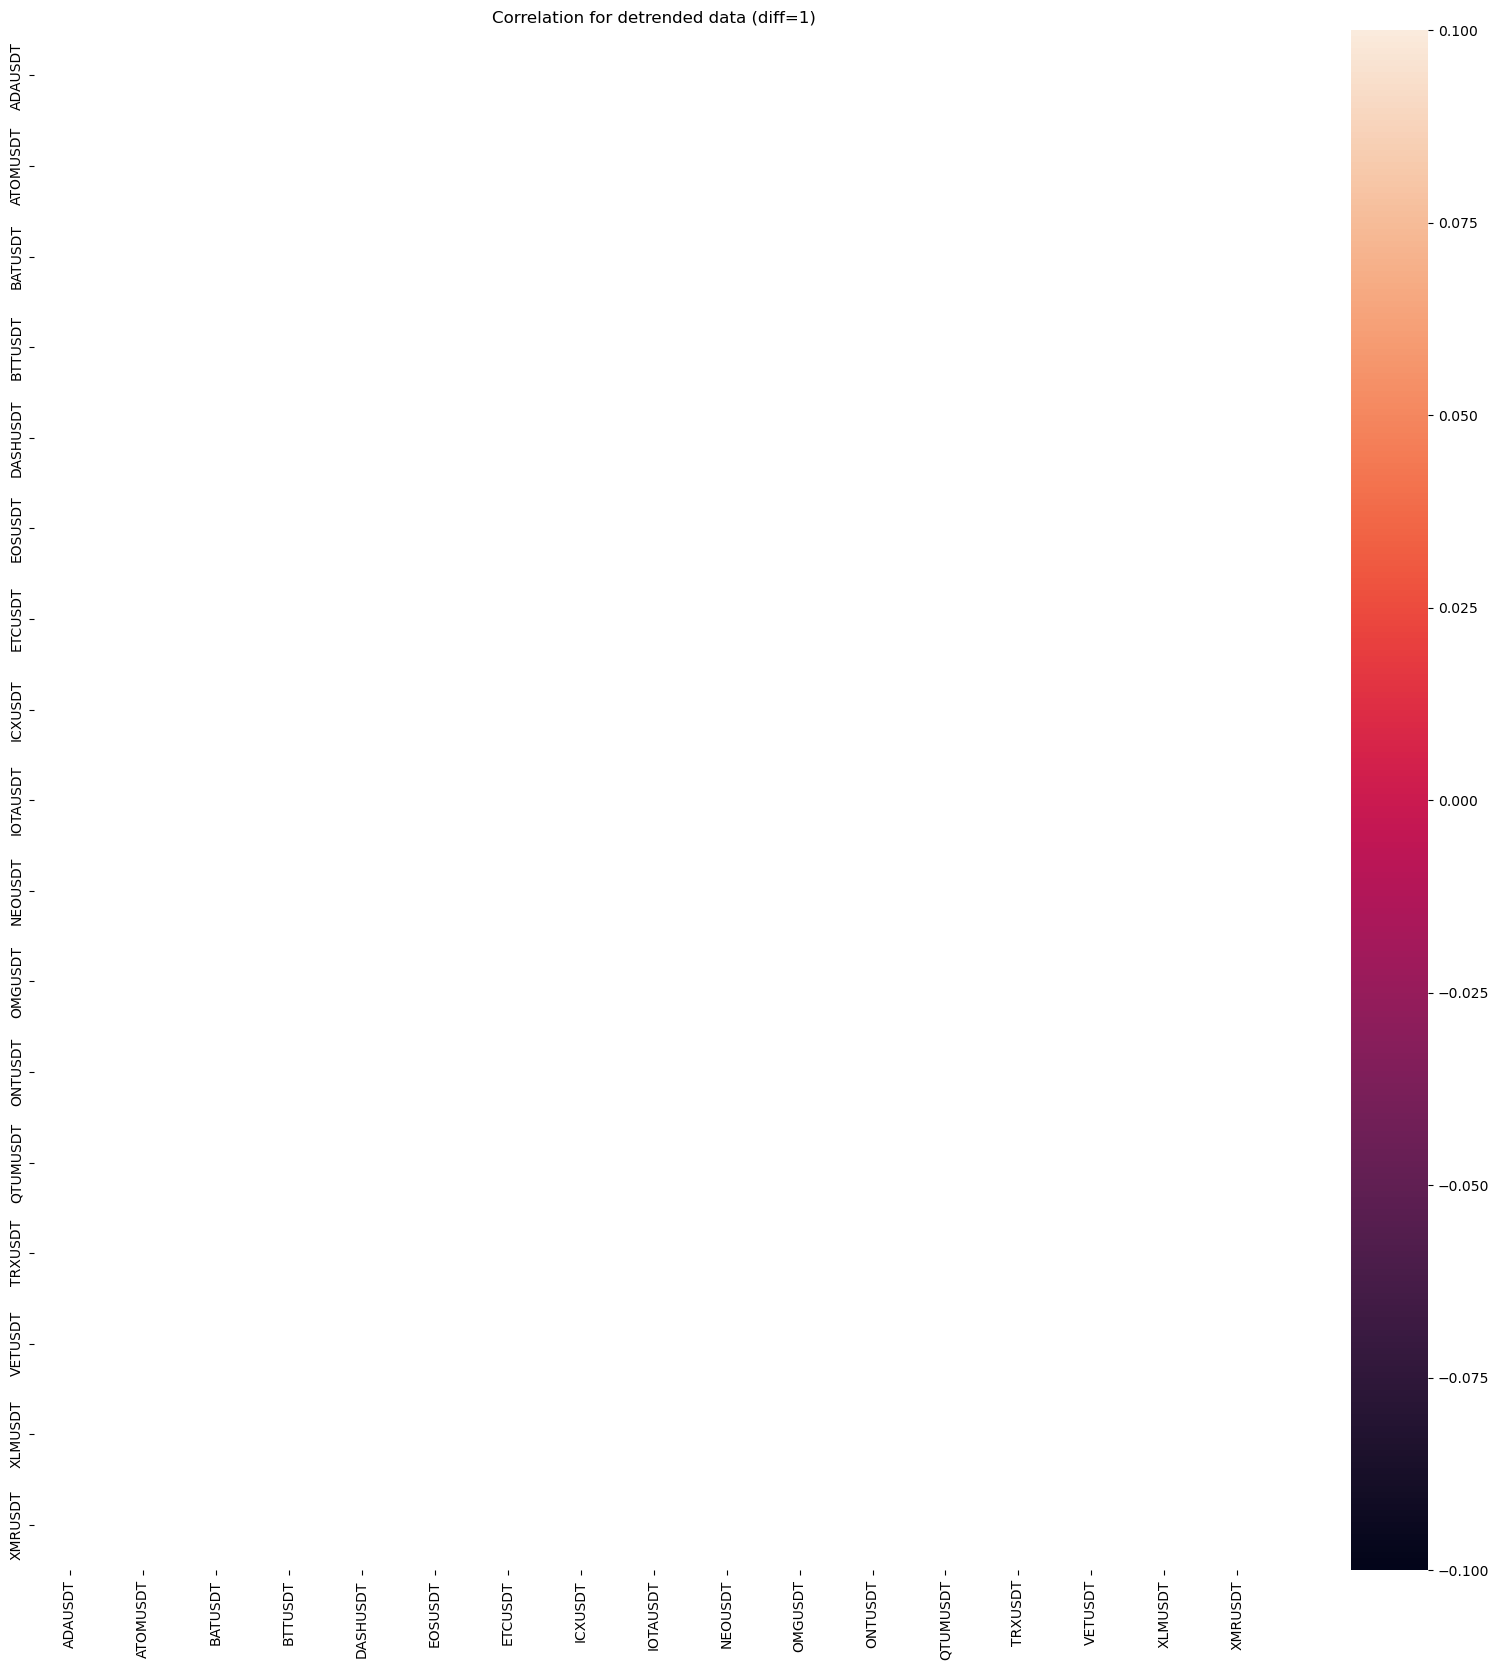

In [10]:
### Examine the trend of the rolling average

radf2 = pd.DataFrame()

for column in coindata:
    if column != 'date':
        radf2[column] = coindata[column].rolling(window=3).mean()

corrMatrix = radf2.corr()
fig = plt.figure(figsize=(20,20))
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation for detrended data (diff=1)')
plt.show()